In [11]:
import matplotlib.pyplot as plt
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, \
    load_robot_execution_failures
download_robot_execution_failures()
timeseries, y = load_robot_execution_failures()

In [21]:
timeseries.head()

,id,time,F_x,F_y,F_z,T_x,T_y,T_z
0,1,0,-1,-1,63,-3,-1,0
1,1,1,0,0,62,-3,-1,0
2,1,2,-1,-1,61,-3,0,0
3,1,3,-1,-1,63,-2,-1,0
4,1,4,-1,-1,63,-3,-1,0


In [28]:
y.head()

1    True
2    True
3    True
4    True
5    True
dtype: bool

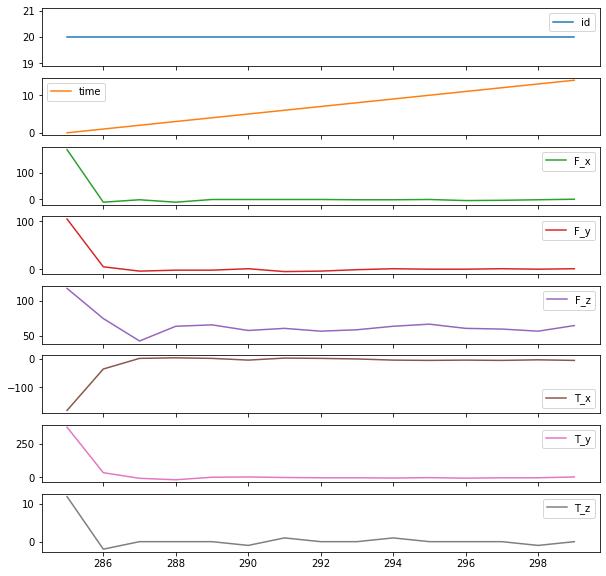

In [13]:
timeseries[timeseries['id'] == 20].plot(subplots = True, sharex = True, figsize = (10,10))
plt.show()

In [14]:
from tsfresh import extract_features
extracted_features = extract_features(timeseries, column_id = 'id', column_sort = 'time')

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 10/10 [00:17<00:00,  1.79s/it]


In [26]:
extracted_features.head()

,F_x__variance_larger_than_standard_deviation,F_x__has_duplicate_max,F_x__has_duplicate_min,F_x__has_duplicate,F_x__sum_values,F_x__abs_energy,F_x__mean_abs_change,F_x__mean_change,F_x__mean_second_derivative_central,F_x__median,...,T_z__fourier_entropy__bins_2,T_z__fourier_entropy__bins_3,T_z__fourier_entropy__bins_5,T_z__fourier_entropy__bins_10,T_z__fourier_entropy__bins_100,T_z__permutation_entropy__dimension_3__tau_1,T_z__permutation_entropy__dimension_4__tau_1,T_z__permutation_entropy__dimension_5__tau_1,T_z__permutation_entropy__dimension_6__tau_1,T_z__permutation_entropy__dimension_7__tau_1
1,0.0,0.0,1.0,1.0,-14.0,14.0,0.142857,0.000000,-0.038462,-1.0,...,0.562335,0.735622,0.974315,1.288185,1.906155,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
2,0.0,1.0,1.0,1.0,-13.0,25.0,1.000000,0.000000,-0.038462,-1.0,...,0.562335,0.562335,1.073543,1.494175,2.079442,0.937156,1.234268,1.540306,1.748067,1.831020
3,0.0,0.0,1.0,1.0,-10.0,12.0,0.714286,0.000000,-0.038462,-1.0,...,0.661563,1.039721,1.386294,1.732868,2.079442,1.265857,1.704551,2.019815,2.163956,2.197225
4,0.0,1.0,1.0,1.0,-6.0,16.0,1.214286,-0.071429,-0.038462,0.0,...,0.562335,0.735622,1.073543,1.494175,2.079442,1.156988,1.907284,2.397895,2.302585,2.197225
5,0.0,0.0,0.0,1.0,-9.0,17.0,0.928571,-0.071429,0.038462,-1.0,...,0.562335,0.562335,0.900256,1.320888,2.079442,1.156988,1.863680,2.271869,2.302585,2.197225


## Select features

In [16]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

impute(extracted_features)
features_filtered = select_features(extracted_features,y)

C:\Users\Asus\Anaconda\envs\py3-TF2.0\lib\site-packages\tsfresh\utilities\dataframe_functions.py:172: RuntimeWarning: The columns ['F_x__partial_autocorrelation__lag_7'
 'F_x__partial_autocorrelation__lag_8'
 'F_x__partial_autocorrelation__lag_9' ...
 'T_z__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"min"'
 'T_z__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"mean"'
 'T_z__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"var"'] did not have any finite values. Filling with zeros.
  df.iloc[:, np.where(is_col_non_finite)[0]].columns.values), RuntimeWarning)


In [17]:
features_filtered.head()

,F_x__value_count__value_-1,F_x__abs_energy,F_x__range_count__max_1__min_-1,F_y__abs_energy,T_y__variance,T_y__standard_deviation,"F_x__fft_coefficient__attr_""abs""__coeff_1","T_y__fft_coefficient__attr_""abs""__coeff_1",T_y__abs_energy,F_z__standard_deviation,...,"T_x__change_quantiles__f_agg_""var""__isabs_True__qh_0.2__ql_0.0","F_z__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.8",T_x__quantile__q_0.1,F_y__has_duplicate_max,"F_y__cwt_coefficients__coeff_14__w_5__widths_(2, 5, 10, 20)","F_y__cwt_coefficients__coeff_13__w_2__widths_(2, 5, 10, 20)",T_y__quantile__q_0.1,F_z__time_reversal_asymmetry_statistic__lag_1,F_x__quantile__q_0.2,F_y__quantile__q_0.7
1,14.0,14.0,15.0,13.0,0.222222,0.471405,1.000000,1.165352,10.0,1.203698,...,0.0,0.0,-3.0,1.0,-0.751682,-0.310265,-1.0,-596.000000,-1.0,-1.0
2,7.0,25.0,13.0,76.0,4.222222,2.054805,0.624118,6.020261,90.0,4.333846,...,0.0,1.0,-9.2,1.0,0.057818,-0.202951,-3.6,-680.384615,-1.0,-1.0
3,11.0,12.0,14.0,40.0,3.128889,1.768867,2.203858,8.235442,103.0,4.616877,...,0.0,3.0,-6.6,0.0,0.912474,0.539121,-4.0,-617.000000,-1.0,0.0
4,5.0,16.0,10.0,60.0,7.128889,2.669998,0.844394,12.067855,124.0,3.833188,...,0.0,0.0,-9.0,0.0,-0.609735,-2.641390,-4.6,3426.307692,-1.0,1.0
5,9.0,17.0,13.0,46.0,4.160000,2.039608,2.730599,6.445330,180.0,4.841487,...,0.0,0.0,-9.6,0.0,0.072771,0.591927,-5.0,-2609.000000,-1.0,0.8


In [18]:
from tsfresh import extract_relevant_features

features_filtered_direct = extract_relevant_features(timeseries, y, column_id = 'id', column_sort = 'time')

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 10/10 [00:17<00:00,  1.79s/it]


In [19]:
features_filtered_direct.head()

,F_x__value_count__value_-1,F_x__abs_energy,F_x__range_count__max_1__min_-1,F_y__abs_energy,T_y__variance,T_y__standard_deviation,"F_x__fft_coefficient__attr_""abs""__coeff_1","T_y__fft_coefficient__attr_""abs""__coeff_1",T_y__abs_energy,F_z__standard_deviation,...,"T_x__change_quantiles__f_agg_""var""__isabs_True__qh_0.2__ql_0.0","F_z__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.8",T_x__quantile__q_0.1,F_y__has_duplicate_max,"F_y__cwt_coefficients__coeff_14__w_5__widths_(2, 5, 10, 20)","F_y__cwt_coefficients__coeff_13__w_2__widths_(2, 5, 10, 20)",T_y__quantile__q_0.1,F_z__time_reversal_asymmetry_statistic__lag_1,F_x__quantile__q_0.2,F_y__quantile__q_0.7
1,14.0,14.0,15.0,13.0,0.222222,0.471405,1.000000,1.165352,10.0,1.203698,...,0.0,0.0,-3.0,1.0,-0.751682,-0.310265,-1.0,-596.000000,-1.0,-1.0
2,7.0,25.0,13.0,76.0,4.222222,2.054805,0.624118,6.020261,90.0,4.333846,...,0.0,1.0,-9.2,1.0,0.057818,-0.202951,-3.6,-680.384615,-1.0,-1.0
3,11.0,12.0,14.0,40.0,3.128889,1.768867,2.203858,8.235442,103.0,4.616877,...,0.0,3.0,-6.6,0.0,0.912474,0.539121,-4.0,-617.000000,-1.0,0.0
4,5.0,16.0,10.0,60.0,7.128889,2.669998,0.844394,12.067855,124.0,3.833188,...,0.0,0.0,-9.0,0.0,-0.609735,-2.641390,-4.6,3426.307692,-1.0,1.0
5,9.0,17.0,13.0,46.0,4.160000,2.039608,2.730599,6.445330,180.0,4.841487,...,0.0,0.0,-9.6,0.0,0.072771,0.591927,-5.0,-2609.000000,-1.0,0.8
